In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False


#### 강사님 정리 블로그

https://netsong7.tistory.com/

## 1. Scikit-learn 소개

- https://scikit-learn.org


- 인공 지능과 머신 러닝 모델이 훈련용 데이터에만 최적화되어 있으면  과적합이 되기 때문에
- 과적합이 된 경우 훈련용 데이터는 잘 맞추지만, 새로운 데이터가 입력으로 들어오는 경우 오차가 커집니다.
- 따라서, 훈련용 데이터와 테스트 데이터를 적절히 나누어주어서 훈련용 데이터와 테스트 데이터 모두 좋은 결과가 나오게 만드는 게 좋습니다.


## (1) 샘플 소개

In [4]:
from sklearn.datasets import load_boston, load_breast_cancer

In [10]:
# 선형회귀용 샘플
boston = load_boston()
boston
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [8]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
# 이진 분류용 샘플
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [16]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [17]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
cancer.target_names
# array(['malignant', 'benign']
# malignant = 0 , 'benign' = 1
# target은 0,1로 이루어져있고 
# target_names니까

array(['malignant', 'benign'], dtype='<U9')

In [21]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## (2) mglearn

- pip install mglearn

In [23]:
import mglearn

In [27]:
# 이진분류를 위한 데이터셋
mglearn.datasets.make_forge()
# 첫번째 배열 array([[ 9.96346605,  4.59676542]이 들어오면
# 두번째 배열 array([1]이다. # 두번째 배열의 첫번째 값 = 첫번재 배열의 첫번째 값의 결과
# 독립변수 = Feature
# 종속변수 = Target, label

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [28]:
X, y = mglearn.datasets.make_forge() # 튜플이기 때문에 A, b로 이렇게 언패킹 가능

In [31]:
print(X) # 독립변수 # Feature는 대부분 대문자 X로 표현
print("----------------------")
print(y) # 종속변수 # label는 대부분 소문자 y로 표현

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
----------------------
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


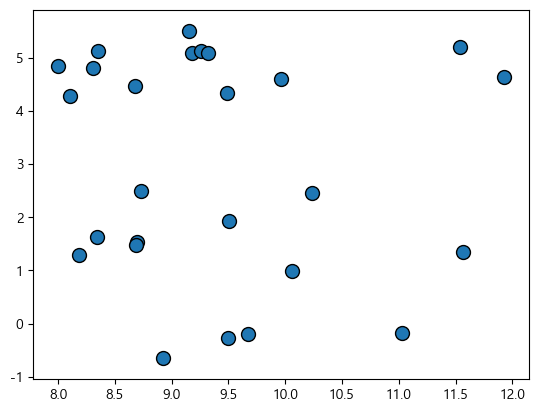

In [35]:
mglearn.discrete_scatter(X[:, 0], X[:, 1])

Text(0, 0.5, '두번째 특성')

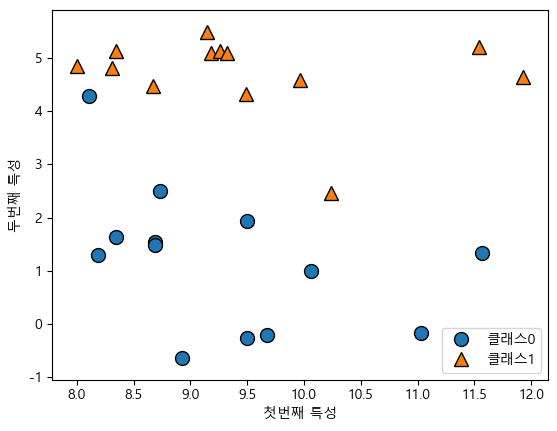

In [44]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) # 값에 해당하는 y를 넣어줌으로써 구별이 되었다.
# 첫번째 자리에는 Feature의 첫번째 열들 전체, 두번째 자리에는 Feature의 두번째 열들 전체
plt.legend(["클래스0", "클래스1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

In [46]:
# 선형회귀를 위한 데이터셋
X, y = mglearn.datasets.make_wave(n_samples=40)

In [47]:
print(X) # 독립변수 # Feature는 대부분 대문자 X로 표현
print("----------------------")
print(y) # 종속변수 # label는 대부분 소문자 y로 표현

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
----------------------
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881

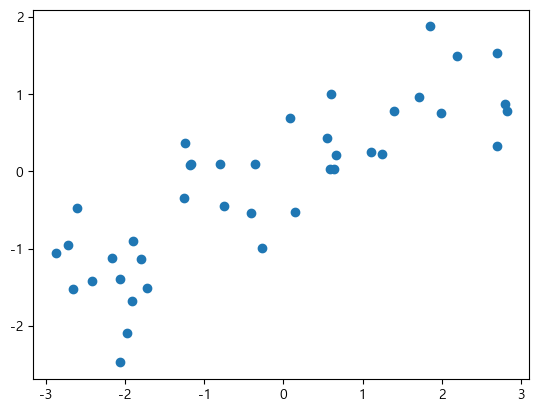

In [50]:
plt.plot(X, y, 'o')

In [59]:
boston = mglearn.datasets.load_extended_boston()
print(boston[0].shape)

(506, 104)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

### (3) API

#### 1) train_test_split()

In [62]:
from sklearn.datasets import load_iris
iris = load_iris()

In [57]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [61]:
# 훈련(학습)용 데이터 분리
X_train = iris.data[:-30]
y_train = iris.target[:-30]

print(X_train.shape, y_train.shape)

# 테스트용 데이터 분리
X_test = iris.data[-30:]
y_test = iris.target[-30:]

print(X_test.shape, y_test.shape)

print(y_test)

(120, 4) (120,)
(30, 4) (30,)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [63]:
from sklearn.model_selection import train_test_split

In [74]:
train_test_split(iris.data, iris.target, test_size=0.3)
# 첫번째 값은 numpy 2차원 배열, 두번째 값은 numpy 1차원 배열
# train_size = 1.0 - test_size
# test_size = 0.1~1.0 전체표본 중 몇%를 테스트용으로 분리할 것인지?

[array([[6.1, 3. , 4.6, 1.4],
        [5.4, 3. , 4.5, 1.5],
        [6.5, 3.2, 5.1, 2. ],
        [5.5, 2.3, 4. , 1.3],
        [5.1, 3.5, 1.4, 0.2],
        [6.2, 2.8, 4.8, 1.8],
        [5.7, 2.5, 5. , 2. ],
        [5.7, 2.6, 3.5, 1. ],
        [7. , 3.2, 4.7, 1.4],
        [6.3, 2.7, 4.9, 1.8],
        [7.6, 3. , 6.6, 2.1],
        [5. , 3.5, 1.6, 0.6],
        [7.4, 2.8, 6.1, 1.9],
        [5.2, 3.5, 1.5, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [5. , 3.3, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.2],
        [5.5, 4.2, 1.4, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [7.7, 2.8, 6.7, 2. ],
        [6.5, 3. , 5.8, 2.2],
        [4.4, 3.2, 1.3, 0.2],
        [5.7, 2.8, 4.1, 1.3],
        [6.3, 3.3, 4.7, 1.6],
        [6.4, 2.9, 4.3, 1.3],
        [6.2, 2.9, 4.3, 1.3],
        [5. , 3.4, 1.6, 0.4],
        [6.3, 2.5, 5. , 1.9],
        [5.9, 3. , 4.2, 1.5],
        [6. , 2.2, 5. , 1.5],
        [5.3, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.9, 0.2],
        [5.5, 2.4, 3.8, 1.1],
        [6

In [75]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

print(len(X_train), len(X_test), len(y_train), len(y_test))
# 0.7 : 0.3의 비율로 나눠진 것을 확인할 수 있음.

105 45 105 45


In [86]:
# pd.Series(X_train).value_counts() # 1차원이라서 안되기에 .flatten()으로 2차원으로 넣어줌
print(pd.Series(X_test.flatten()).value_counts())
print(pd.Series(X_train.flatten()).value_counts())
print(pd.Series(y_test.flatten()).value_counts())
print(pd.Series(y_train.flatten()).value_counts())

1.4    8
3.0    8
1.3    8
1.5    7
0.2    7
      ..
2.2    1
6.1    1
5.3    1
0.3    1
2.1    1
Length: 62, dtype: int64
0.2    22
3.0    19
1.5    18
1.4    13
1.3    12
       ..
0.6     1
7.6     1
1.1     1
7.3     1
7.0     1
Length: 74, dtype: int64
1    20
0    13
2    12
dtype: int64
2    38
0    37
1    30
dtype: int64


In [82]:
# ?train_test_split

"""
(
test_size=None,
train_size=None,
random_state=None, # 똑같은 난수에서 진행될 수 있도록, None일 경우 매번 난수의 값이 달라짐
shuffle=True, # 기본값이 True, 데이터를 섞어줌. 항상 골고루 섞인다는 보장은 없음. 결과가 잘 안나올경우 다시 셔플할 필요 존재
stratify=None, # 아래 참고
)

"""

# train_test_split()함수는 기본적으로 테스트 세트를 25%로 나눔 (훈련 세트는 75%)
# 그러나 테스트 세트의 갯수가 훈련 세트에 비해 터무니 없이 작을 때 샘플링 편향이 발생할 수 있음
# 그것을 방지하기 위해 train_test_split()함수 내에 stratify 매개변수에 타깃 데이터를 전달하면
# 클래스 비율에 맞게 데이터를 나누게 됨


'\n(\ntest_size=None,\ntrain_size=None,\nrandom_state=None, # 똑같은 난수에서 진행될 수 있도록, None일 경우 매번 난수의 값이 달라짐\nshuffle=True, # 기본값이 True, 데이터를 섞어줌. 항상 골고루 섞인다는 보장은 없음. 결과가 잘 안나올경우 다시 셔플할 필요 존재\nstratify=None, # \n)\n\n'

In [87]:
# stratify 확인용
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, stratify = iris.target)

print(len(X_train), len(X_test), len(y_train), len(y_test))

105 45 105 45


In [88]:
# stratify 확인용
# y값을 보면 매우 균일하게 분류된 것을 확인가능
print(pd.Series(X_test.flatten()).value_counts())
print(pd.Series(X_train.flatten()).value_counts())
print(pd.Series(y_test.flatten()).value_counts())
print(pd.Series(y_train.flatten()).value_counts())

1.5    10
0.2     8
1.4     7
5.1     6
6.7     5
1.3     5
3.2     5
3.4     5
5.0     5
4.5     5
3.0     5
0.3     5
1.8     5
3.8     5
2.3     4
4.4     4
2.8     4
6.4     4
2.0     4
2.5     4
2.7     4
7.7     3
1.0     3
5.8     3
4.6     3
5.6     3
2.9     3
3.6     3
1.6     3
2.2     3
5.7     3
6.0     3
4.8     3
6.1     2
5.5     2
6.5     2
6.3     2
3.3     2
5.4     2
0.4     2
3.1     2
7.2     2
6.8     1
7.9     1
4.7     1
5.9     1
3.9     1
5.2     1
4.9     1
1.7     1
2.6     1
1.2     1
2.1     1
1.9     1
6.2     1
4.1     1
4.2     1
3.7     1
7.3     1
dtype: int64
3.0    22
0.2    21
1.3    15
1.5    15
1.4    14
       ..
7.1     1
7.0     1
0.5     1
0.6     1
7.6     1
Length: 72, dtype: int64
2    15
1    15
0    15
dtype: int64
0    35
2    35
1    35
dtype: int64


In [90]:
X_test.mean(), X_train.mean() # 훈련용으로 하든, 테스트용으로 하더라도 둘의 값이 너무 차이가 나서는 안됨.(비슷해야함)

(3.5044444444444447, 3.4473809523809527)

### 2) 문자열 해결을 위한 데이터 인코딩

- 레이블 인코딩
- 원 핫 인코딩

#### 레이블 인코딩 : Category Feature를 코드형 숫자값으로 변환

In [96]:
from sklearn.preprocessing import LabelEncoder

items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [97]:
print(labels)

[0 1 4 5 3 3 2 2]


In [98]:
dir(encoder)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'classes_',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_params',
 'transform']

In [99]:
print(encoder.classes_) # TV가 0번 냉장고가 1번 믹서가 2번 이런식으로 정해져있음을 알 수 있다.

['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [102]:
print(encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))
print(encoder.inverse_transform(labels))

['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']
['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


#### 원 핫 인코딩

- 새로운 feature를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지는 0으로 표시
- 사전에 반드시 숫자로 변환이 되어있어야 한다.
- 입력값으로 2차원 데이터가 필요하다.

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

labels # 현재 1차원

labels = labels.reshape(-1, 1) # 2차원 # -1은 옆과 차원을 맞추겠다

onehot = OneHotEncoder()
onehot.fit(labels)
oh = onehot.transform(labels)
oh

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [109]:
oh.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

#### pandas의 get_dummies()

In [111]:
items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]
pd.get_dummies(items) # 숫자로 변환하지 않더라도 바로 0과1로 만들어줌, dataframe형식

,TV,냉장고,믹서,선풍기,전자렌지,컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [114]:
df = pd.DataFrame({"item":items})
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [115]:
pd.get_dummies(df) # 변수가 눌어났다.

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 3) Feature Scaling

- 표준화 : (Xi - mean(X)) / sd(X)
- Xi = X의 i번째 값
- sd(X) X의 표준편차

- 정규화 : (Xi - mean(X)) / (max(X) - min(X))


In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### StandardScaler

In [121]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [123]:
print("feature들의 평균\n", df.mean())
print("------------------------------")
print("feature들의 분산\n", df.var())

feature들의 평균
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
------------------------------
feature들의 분산
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [126]:
scaler = StandardScaler()
scaler.fit(df)
iris_scaled = scaler.transform(df)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [128]:
df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 평균\n", df_scaled.mean())
print("------------------------------")
print("feature들의 분산\n", df_scaled.var())

feature들의 평균
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
------------------------------
feature들의 분산
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [ ]:
# 표준화 = 아무리 값과 값의 크기가 차이나더라도 0~1사이의 간격으로 줄여버린다.

#### MinMaxScaler

In [131]:
scaler = MinMaxScaler()
scaler.fit(df)
iris_scaled = scaler.transform(df)
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [132]:
df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 평균\n", df_scaled.mean())
print("------------------------------")
print("feature들의 분산\n", df_scaled.var())

feature들의 평균
 sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
------------------------------
feature들의 분산
 sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


####  Scaling을 할 때 주의점

In [133]:
train = np.arange(0, 11).reshape(-1, 1)
test = np.arange(0, 6).reshape(-1, 1)
print(train)
print(test)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [139]:
sclaer = MinMaxScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
train_scaled

print("원본 : ", train.flatten())
print("스케일링 : ", train_scaled.flatten())
# 간격이 0.1로 fit되어 있다
# 0.1 0.2 0.3

print("--------------------------------------------")

#scaler.fit(test) # 주석처리 하기전엔 새로 fit되어서 0.2간격이 되었지만, 같은 데이터로 사용할 때 fit은 한번만 한다.
test_scaled = scaler.transform(test)

print("원본 : ", test.flatten())
print("스케일링 : ", test_scaled.flatten())
# 간격이 0.2로 fit되어 있다
# 0.2 0.4 0.6
# 이렇게 하면 안된다.
# 위에서 fit을 했다면 계속해서 한번 정해진 fit을 유지해줘야한다.

원본 :  [ 0  1  2  3  4  5  6  7  8  9 10]
스케일링 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
--------------------------------------------
원본 :  [0 1 2 3 4 5]
스케일링 :  [0.  0.1 0.2 0.3 0.4 0.5]


## 2. 통계 검증과 머신러닝 분석의 차이

In [4]:
df = pd.read_csv("../data/wine.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### (1) 통계적 방법

In [6]:
import statsmodels .api as sm

In [8]:
# 독립변수와 종속변수를 나누기
# 0~10의 컬럼 전부
# 종속변수 = quality
X = df[df.columns[0:11]]
y = df[["quality"]]

In [9]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [24]:
# 각 자료가 회귀선보다 위와 아래에 모두 존재하여 각 잔차가 양이 될 수도 있고 음이 될 수도 있어서,
# 이 경우 잔차를 모두 더할 경우 상쇄되므로 적절하지 않다.
# 이에 잔차끼리 상쇄되는 일을 방지하기 위하여 모든 값을 0 이상으로 만든 뒤 총합을 구하는 것

# 모든 값을 0 이상으로 만드는 방법으로는 잔차항을 제곱합을 구하는 방법, 잔차항의 절댓값의 합을 구하는 방법, 잔차항과 회귀선의 수직거리의 합을 구하는 방법 등이 있는데
# 최소자승법은 '자승'이라는 이름에서 알 수 있듯이 잔차항의 제곱합을 최소화하는 방법

In [23]:
# 선형 회귀 분석
# 최소자승법(OLS)

multi_model = sm.OLS(y, X).fit()
print(multi_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.108e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):                        0.00
Time:                        10:18:18   Log-Likelihood:                         -1569.7
No. Observations:                1599   AIC:                                      3161.
Df Residuals:                    1588   BIC:                                      3221.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [20]:
# y의 절편을 따로 지정하지 않는다면 항상 0에서 시작하는 것으로 계산
# 그래서 별도로 지정을 해줘야함

X_add = sm.add_constant(X)

multi_model = sm.OLS(y, X_add).fit()
print(multi_model.summary())
# 절편값을 지정해주지 않은 위의 쉘과 비교 했을 때,
# fixed_acidity 위에 const라는 절편값이 생긴 것을 알 수 있다.(첫번째줄)
# const 21.9652  : y절편이 21을 지나간다(21.9652)

# Adj. R-squared (uncentered) : 0.356 # 설명력이 35.6%
# Prob (F-statistic):          1.79e-145
# P -value < 0.05
# 차이가 있다.

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.79e-145
Time:                        10:09:53   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

### (2) 머신러닝 방법

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
# feature(특성, 훈련 데이터)Label(타겟, 정답 데이터) 나누기
X = df[df.columns[0:11]]
y = df[["quality"]]

In [42]:
# 훈련 데이터와 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1119 480 1119 480


In [43]:
# 훈련(학습)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# 평가
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
# 훈련용과 시험용의 결과가 너무 차이가 나서는 안된다,

0.3611982441321645
0.35138853325173824


In [53]:
# 예측(서비스런칭)
pred = model.predict(X_test)
print(pred[-10:])
print(y_test.tail(10))

# pred[:10]과 head(10)의 경우 대체로 비슷한 값이 많았지만
# -10:0과 tail의 경우(뒤쪽의 값일 경우) 오차가 커진 것을 확인 할 수 있었다.

[[6.40305857]
 [5.64546643]
 [5.9018755 ]
 [6.03923916]
 [5.31818054]
 [5.59798613]
 [6.10590038]
 [5.74478368]
 [6.10179844]
 [5.48072956]]
      quality
915         6
1307        4
1579        5
1409        6
179         5
1468        7
495         8
1325        6
514         7
576         4
